In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
IMG_SIZE = 256
Batch_size = 30

In [7]:
tf_data = tf.keras.preprocessing.image_dataset_from_directory(
    "DATA",
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = Batch_size,
    shuffle=True
)

Found 2152 files belonging to 3 classes.


In [24]:
class_name=tf_data.class_names
n_class = len(class_name)

In [26]:
train = tf_data.take(int(len(tf_data)*0.8))

In [27]:
val = tf_data.skip(int(len(tf_data)*0.8)).take(int(len(tf_data)*0.1))

In [28]:
test = tf_data.skip(int(len(tf_data)*0.8)).skip(int(len(tf_data)*0.1)).take(int(len(tf_data)*0.1))

In [29]:
train = train.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0/256)
])

In [15]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

In [16]:
input_shape = (Batch_size,IMG_SIZE,IMG_SIZE,3)

model = keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),
    layers.MaxPooling2D((2,2)),
                  
    layers.Conv2D(82,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),
    layers.MaxPooling2D((2,2)),
                  
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),
    layers.MaxPooling2D((2,2)),
                  
    layers.Conv2D(64,(2,2),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),
    layers.MaxPooling2D((2,2)),
                  
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),
    layers.MaxPooling2D((2,2)),
                  
                  
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation = 'softmax')
])

In [17]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
hist = model.fit(
    train,
    epochs = 50,
    verbose =1,
    validation_data = val          
         ) 

Epoch 1/50
57/57 [==============================] - 57s 998ms/step - loss: 0.1391 - accuracy: 0.9456 - val_loss: 0.1376 - val_accuracy: 0.9333
Epoch 2/50
 2/57 [>.............................] - ETA: 54s - loss: 0.0991 - accuracy: 0.9333

KeyboardInterrupt: 

NameError: name 'model' is not defined

In [28]:
model.save(f"/Users/praveenraj/Desktop/AI /potato_leaf_disease/models/{1}")

INFO:tensorflow:Assets written to: /Users/praveenraj/Desktop/AI /potato_leaf_disease/models/1/assets


INFO:tensorflow:Assets written to: /Users/praveenraj/Desktop/AI /potato_leaf_disease/models/1/assets


In [20]:
model = tf.keras.models.load_model("/Users/praveenraj/Desktop/AI /potato_leaf_disease/models/1")

In [22]:
scores = model.evaluate(test)

7/7 [==============================] - 2s 181ms/step - loss: 0.1025 - accuracy: 0.9571


first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 195ms/step
predicted label: Potato___Late_blight


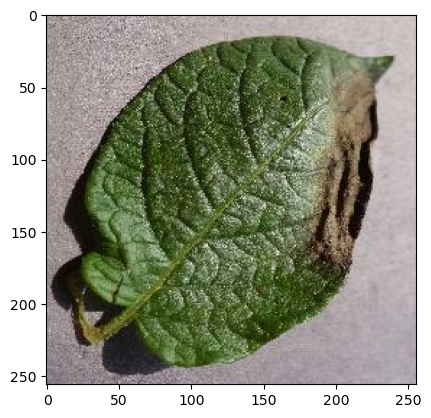

In [31]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])
    

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


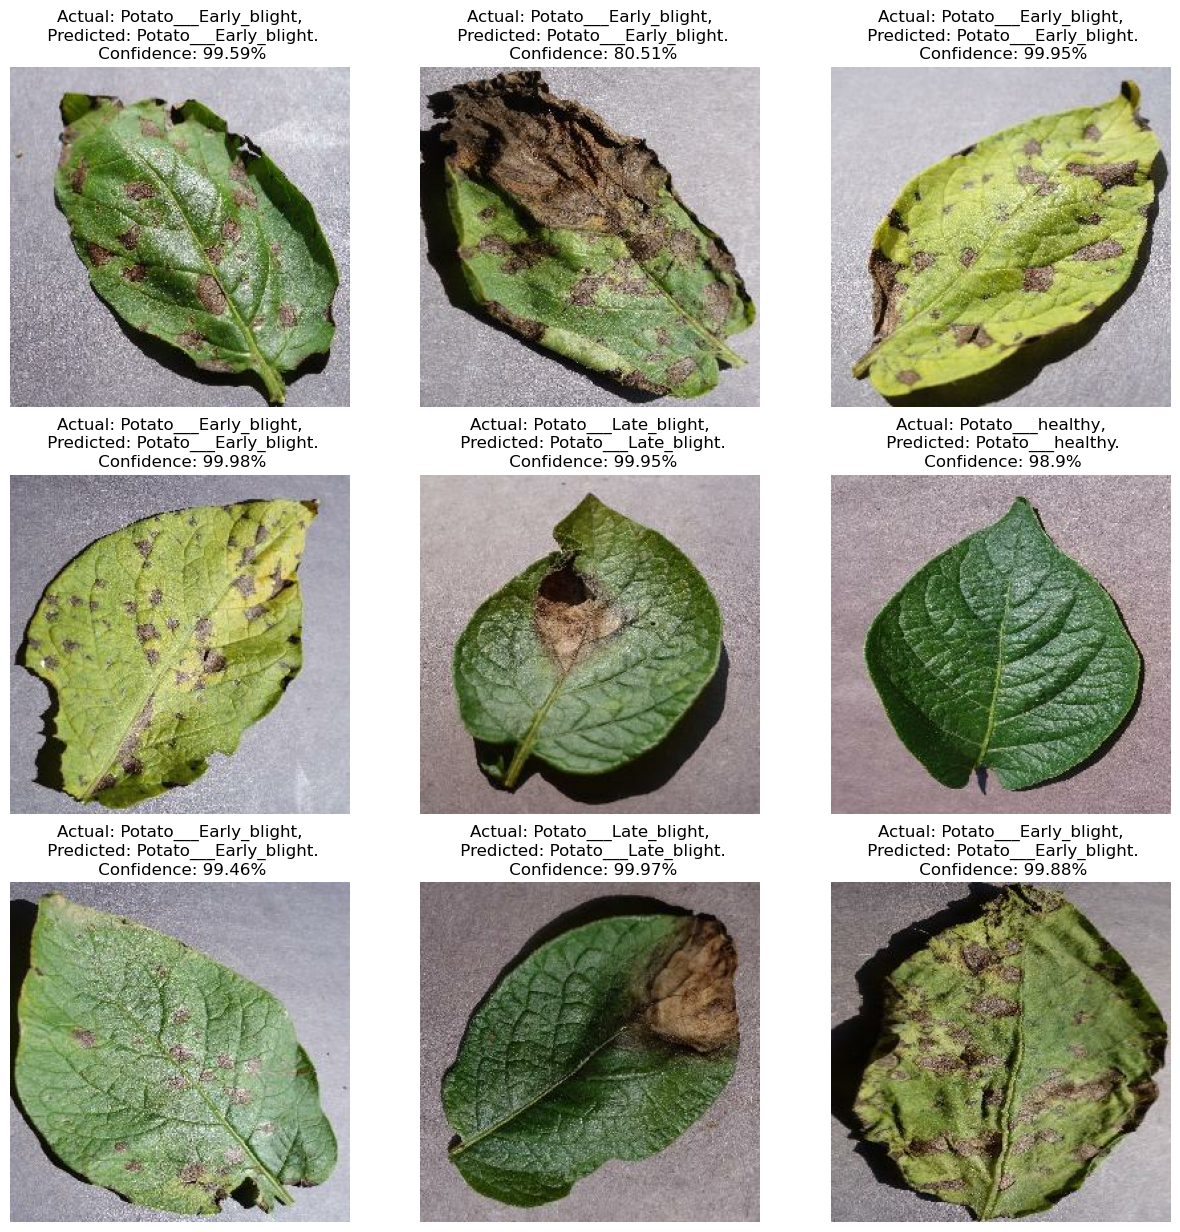

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")